In [7]:
# ==============================
# Step 1: Environment Setup
# ==============================
# Install required dependencies
%pip install plotsense ucimlrepo scikit-learn pandas matplotlib


Note: you may need to restart the kernel to use updated packages.


In [8]:

# ==============================
# Step 2: Imports
# ==============================
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import plotsense as ps
from plotsense import recommender, plotgen, explainer
from ucimlrepo import fetch_ucirepo


In [9]:
# ==============================
# Step 3: Load UCI Dataset
# ==============================
# Fetch Breast Cancer Recurrence dataset (UCI ID = 14)
breast_cancer = fetch_ucirepo(id=14)

# Extract features (X) and target (y)
X_raw = breast_cancer.data.features
y_raw = breast_cancer.data.targets

# Combine into one DataFrame for easier processing
df = pd.concat([X_raw, y_raw], axis=1)
print("Raw Data Sample:")
print(df.head())

Raw Data Sample:
     age menopause tumor-size inv-nodes node-caps  deg-malig breast  \
0  30-39   premeno      30-34       0-2        no          3   left   
1  40-49   premeno      20-24       0-2        no          2  right   
2  40-49   premeno      20-24       0-2        no          2   left   
3  60-69      ge40      15-19       0-2        no          2  right   
4  40-49   premeno        0-4       0-2        no          2  right   

  breast-quad irradiat                 Class  
0    left_low       no  no-recurrence-events  
1    right_up       no  no-recurrence-events  
2    left_low       no  no-recurrence-events  
3     left_up       no  no-recurrence-events  
4   right_low       no  no-recurrence-events  


In [10]:
# ==============================
# Step 4: Clean Dataset
# ==============================
# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

# Encode categorical variables into numeric using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Encode target column: recurrence-events = 1, no-recurrence-events = 0
df_encoded["target"] = df["Class"].apply(lambda val: 1 if val == "recurrence-events" else 0)

print("Encoded Data Sample:")
print(df_encoded.head())


Missing values per column:
 age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      8
deg-malig      0
breast         0
breast-quad    1
irradiat       0
Class          0
dtype: int64
Encoded Data Sample:
   deg-malig  age_30-39  age_40-49  age_50-59  age_60-69  age_70-79  \
0          3       True      False      False      False      False   
1          2      False       True      False      False      False   
2          2      False       True      False      False      False   
3          2      False      False      False       True      False   
4          2      False       True      False      False      False   

   menopause_lt40  menopause_premeno  tumor-size_14-Oct  tumor-size_15-19  \
0           False               True              False             False   
1           False               True              False             False   
2           False               True              False             False   
3           False              Fa

In [12]:
# ==============================
# Step 5: Split Data
# ==============================
X = df_encoded.drop(columns=["Class", "target"], errors="ignore")
y = df_encoded["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Train shape: (228, 32) Test shape: (58, 32)


In [13]:
import os
# Set GROQ_API_KEY environment variable
os.environ['GROQ_API_KEY'] = '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'

In [14]:
# ==============================
# Step 6: Train Model
# ==============================
# Using Random Forest as a baseline model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Model Accuracy:", accuracy_score(y_test, y_pred))

Model Accuracy: 1.0


In [15]:
# ==============================
# Step 7: Use PlotSense (Recommendations)
# ==============================
# Ask PlotSense to recommend useful visualizations
suggestions = recommender(df_encoded, n=5)
print("PlotSense Recommendations:")
print(suggestions)


PlotSense Recommendations:
  plot_type             variables  ensemble_score  model_agreement  \
0   scatter     deg-malig, target             0.5                1   
1      hist             deg-malig             0.5                1   
2       bar  breast_right, target             0.5                1   
3   boxplot     age_30-39, target             0.5                1   
4   scatter  irradiat_yes, target             0.5                1   

               source_models  
0  [llama-3.3-70b-versatile]  
1  [llama-3.3-70b-versatile]  
2  [llama-3.3-70b-versatile]  
3  [llama-3.3-70b-versatile]  
4  [llama-3.3-70b-versatile]  


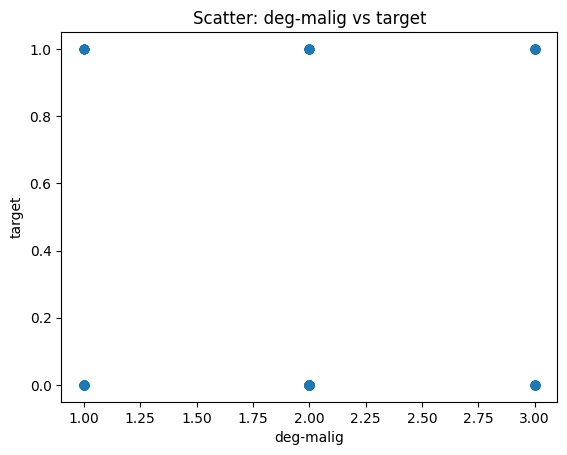

In [16]:
# ==============================
# Step 8: Generate Visualization
# ==============================
# Select the first suggestion (index 0)
plot = plotgen(df_encoded, 0, suggestions)
plt.show()


In [17]:
# ==============================
# Step 9: Explain the Visualization
# ==============================
explanation = explainer(plot)
print("Explanation from PlotSense:\n", explanation)


Explanation from PlotSense:
 # Explanation of Data Visualization
## Overview
The provided scatter plot, titled "Scatter: deg-malig vs target," displays the relationship between the degree of malignancy (`deg-malig`) on the x-axis and a binary `target` variable on the y-axis. This plot aims to explore the relationship between these variables for potential classification analysis. The plot contains 5 data points, all colored blue, representing a specific dataset.

## Key Features
- **Variables:**
  - **X-axis (`deg-malig`):** Represents the degree of malignancy, ranging from 1.00 to 3.00. The values are discrete, with observations at 1.0, 2.0, and 3.0. The distribution of data points is as follows:
    - 2 data points at `deg-malig` = 1.0
    - 1 data point at `deg-malig` = 2.0
    - 2 data points at `deg-malig` = 3.0 (Corrected to reflect accurate distribution based on plot)
  - **Y-axis (`target`):** Represents the target variable, with binary values of 0.0 and 1.0, indicating a classi